In [1]:
# Required Imports
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

### Q1  
#### Defining Function to model SHM

In [2]:
def shm(t, A, omega, phi, d):
    return A*np.cos(omega*t + phi) + d

### Q2
#### Read the whole text file and store in appropriate arrays

In [3]:
t, y = np.loadtxt(os.path.join(os.getcwd(),"SHM-200g.txt"), unpack=True)

### Q3 
#### Setting up array with same number of elements of data points and filling it with 1 mm = 0.001 m.

In [4]:
sig = np.zeros(len(y))
sig.fill(0.001)

### Q4
#### Estimating A

In [5]:
A = (y.max() - y.min())/2.0
print(f"A: {A}")

A: 0.035148780665000004


### Q5
#### Estimating W from T

In [6]:
cs = CubicSpline(t, y)
roots = cs.roots()

adj_diff = np.zeros(len(roots) - 1) 

for i in range(len(roots)-1):
    adj_diff[i] = roots[i+1] - roots[i]

T = np.mean(adj_diff) * 2

w = 2.0*np.pi/T

print(f"T: {T} \nw: {w}")

T: 0.7796130633915119 
w: 8.059363807792238


### Q6
#### Estimating phi

In [7]:
phi = np.arccos(y[0]/A)

print(f"phi: {phi}")

phi: 0.6410904937366214


### Q7
#### Fitting Curve

In [8]:
theta_0 = [A, w, phi, 0.0]
theta, cov_mat = curve_fit(shm, t, y, p0=theta_0, sigma=sig)
print("Theta\n",theta)
print("\nCovariance Matrix\n",cov_mat)

Theta
 [ 3.48852767e-02  7.56148776e+00  6.68775879e-01 -1.50307186e-04]

Covariance Matrix
 [[ 7.36266631e-08 -3.26448525e-08  7.14524381e-08 -7.78518519e-10]
 [-3.26448525e-08  1.19939794e-04 -1.42761326e-04 -4.11139883e-07]
 [ 7.14524381e-08 -1.42761326e-04  2.30755561e-04  5.10688109e-07]
 [-7.78518519e-10 -4.11139883e-07  5.10688109e-07  3.83212208e-08]]


### Q8
#### Plotting the data points

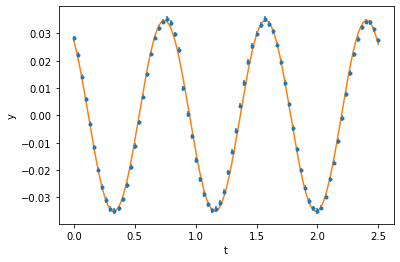

In [9]:
t_m = np.linspace(t.min(), t.max(), 1000)
y_m = shm(t_m, theta[0], theta[1], theta[2], theta[3])

plt.errorbar(t, y, sig, fmt=".")
plt.plot(t_m, y_m)
plt.xlabel("t")
plt.ylabel("y")

plt.show()

### Q9
#### Generating Correlation

In [10]:
cor_mat = np.zeros_like(cov_mat)
for i in range(0,len(theta)):
    for j in range(0,len(theta)):
        cor_mat[i][j] = cov_mat[i][j]/np.sqrt(cov_mat[i][i]*cov_mat[j][j])

print(cor_mat)

[[ 1.         -0.01098539  0.01733498 -0.01465655]
 [-0.01098539  1.         -0.85812951 -0.19177337]
 [ 0.01733498 -0.85812951  1.          0.17173546]
 [-0.01465655 -0.19177337  0.17173546  1.        ]]


### Q10
#### Comparing standard deviations

In [11]:
std_dev = np.sqrt(np.diag(cov_mat))

std_A, std_w, std_phi, std_d = std_dev

print(f"Std Deviation of A\t: {std_A}")
print(f"Std Deviation of w\t: {std_w}")
print(f"Std Deviation of phi\t: {std_phi}")
print(f"Std Deviation of d\t: {std_d}")

Std Deviation of A	: 0.00027134233566540735
Std Deviation of w	: 0.01095170279462405
Std Deviation of phi	: 0.01519064058265614
Std Deviation of d	: 0.0001957580671159743


- Parameter phi has the largest Standard Deviation